# Run SurvTRACE on SUPPORT dataset

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import os, sys
sys.path.append(os.path.abspath('../SurvTRACE'))

In [3]:
import pdb
from collections import defaultdict
import matplotlib.pyplot as plt

from survtrace.dataset import load_data
from survtrace.evaluate_utils import Evaluator
from survtrace.utils import set_random_seed
from survtrace.model import SurvTraceSingle
from survtrace.train_utils import Trainer
from survtrace.config import STConfig

# define the setup parameters
STConfig['data'] = 'support'

seed = STConfig['seed'] # 1234
#seed = 42

set_random_seed(seed)

hparams = {
    'batch_size': 128,
    'weight_decay': 0,
    'learning_rate': 1e-3,
    'epochs': 20,
}

In [4]:
# load data
df, df_train, df_y_train, df_test, df_y_test, df_val, df_y_val = load_data(STConfig)

# get model
model = SurvTraceSingle(STConfig)

# initialize a trainer
trainer = Trainer(model)
train_loss, val_loss = trainer.fit((df_train, df_y_train), (df_val, df_y_val),
        batch_size=hparams['batch_size'],
        epochs=hparams['epochs'],
        learning_rate=hparams['learning_rate'],
        weight_decay=hparams['weight_decay'],)

use pytorch-cuda for training.
[Train-0]: 69.07831454277039
[Val-0]: 1.3623063564300537
[Train-1]: 58.467445611953735
[Val-1]: 1.3373315334320068
[Train-2]: 57.860708236694336
[Val-2]: 1.3320564031600952
[Train-3]: 57.660372257232666
[Val-3]: 1.3224091529846191
[Train-4]: 57.66057777404785
[Val-4]: 1.3394445180892944
EarlyStopping counter: 1 out of 5
[Train-5]: 57.73791694641113
[Val-5]: 1.344979166984558
EarlyStopping counter: 2 out of 5
[Train-6]: 57.72607386112213
[Val-6]: 1.3340665102005005
EarlyStopping counter: 3 out of 5
[Train-7]: 57.69715058803558
[Val-7]: 1.330979824066162
EarlyStopping counter: 4 out of 5
[Train-8]: 57.57134974002838
[Val-8]: 1.3334736824035645
EarlyStopping counter: 5 out of 5
early stops at epoch 9


In [5]:
# evaluate model
evaluator = Evaluator(df, df_train.index)
evaluator.eval(model, (df_test, df_y_test), confidence=.95, nb_bootstrap=100)
print("done")

******************************
start evaluation
******************************
C-td:  0.39004076465522847
For 0.25 quantile,
TD Concordance Index - IPCW: 0.6568521721244578
Brier Score: 0.1380945501766314
Dynamic AUC:  0.6572312325756496
For 0.5 quantile,
TD Concordance Index - IPCW: 0.6347826042934411
Brier Score: 0.20791651216488832
Dynamic AUC:  0.658147298931667
For 0.75 quantile,
TD Concordance Index - IPCW: 0.6259462574892659
Brier Score: 0.22389818629782415
Dynamic AUC:  0.6883593753530133
C-td:  0.38078066897560386
For 0.25 quantile,
TD Concordance Index - IPCW: 0.6805555817341855
Brier Score: 0.13445729570847095
Dynamic AUC:  0.6733899391064999
For 0.5 quantile,
TD Concordance Index - IPCW: 0.6274120957430944
Brier Score: 0.2143971067024108
Dynamic AUC:  0.6432656755566912
For 0.75 quantile,
TD Concordance Index - IPCW: 0.6143734215535593
Brier Score: 0.2281641909453086
Dynamic AUC:  0.6718379951504682
C-td:  0.3862563596618498
For 0.25 quantile,
TD Concordance Index - IPCW: 0

For 0.25 quantile,
TD Concordance Index - IPCW: 0.6658651972557301
Brier Score: 0.1413589997037232
Dynamic AUC:  0.6589298142096345
For 0.5 quantile,
TD Concordance Index - IPCW: 0.6217587301275856
Brier Score: 0.21498073582277877
Dynamic AUC:  0.642535275656708
For 0.75 quantile,
TD Concordance Index - IPCW: 0.5994503033511136
Brier Score: 0.23627913632562383
Dynamic AUC:  0.6417633777822989
C-td:  0.38332161849038493
For 0.25 quantile,
TD Concordance Index - IPCW: 0.6514754967607731
Brier Score: 0.1344686161014227
Dynamic AUC:  0.6377244241192412
For 0.5 quantile,
TD Concordance Index - IPCW: 0.6242919094072145
Brier Score: 0.2103217512171136
Dynamic AUC:  0.6455811352009252
For 0.75 quantile,
TD Concordance Index - IPCW: 0.6094155987140529
Brier Score: 0.2294272731002672
Dynamic AUC:  0.6653133928894354
C-td:  0.40142660303527655
For 0.25 quantile,
TD Concordance Index - IPCW: 0.6531029398623894
Brier Score: 0.13164013687113285
Dynamic AUC:  0.6533823567222894
For 0.5 quantile,
TD C

For 0.25 quantile,
TD Concordance Index - IPCW: 0.651969824461852
Brier Score: 0.1339332090910618
Dynamic AUC:  0.6577710296372379
For 0.5 quantile,
TD Concordance Index - IPCW: 0.6163046896448449
Brier Score: 0.21444842843884626
Dynamic AUC:  0.6301917810957206
For 0.75 quantile,
TD Concordance Index - IPCW: 0.6112457496740351
Brier Score: 0.22927374763650069
Dynamic AUC:  0.6673678101741456
C-td:  0.3871394641274684
For 0.25 quantile,
TD Concordance Index - IPCW: 0.6697124380442635
Brier Score: 0.13428874096044588
Dynamic AUC:  0.6720049182642528
For 0.5 quantile,
TD Concordance Index - IPCW: 0.633620073747425
Brier Score: 0.21147674082825274
Dynamic AUC:  0.6518155453841313
For 0.75 quantile,
TD Concordance Index - IPCW: 0.619825374363235
Brier Score: 0.22705544802590444
Dynamic AUC:  0.6751675009952651
C-td:  0.3888951678823189
For 0.25 quantile,
TD Concordance Index - IPCW: 0.6706741549236763
Brier Score: 0.136392845606374
Dynamic AUC:  0.6712999342764896
For 0.5 quantile,
TD Conc

For 0.25 quantile,
TD Concordance Index - IPCW: 0.6646684796467853
Brier Score: 0.13782503451215444
Dynamic AUC:  0.6741225851306881
For 0.5 quantile,
TD Concordance Index - IPCW: 0.6303029881841706
Brier Score: 0.21023876089560725
Dynamic AUC:  0.6496725423256462
For 0.75 quantile,
TD Concordance Index - IPCW: 0.6176817055412678
Brier Score: 0.2255842616854363
Dynamic AUC:  0.6773295521361954
C-td:  0.39228860203304716
For 0.25 quantile,
TD Concordance Index - IPCW: 0.6570337637656584
Brier Score: 0.13677578324993972
Dynamic AUC:  0.6566451808673607
For 0.5 quantile,
TD Concordance Index - IPCW: 0.6179279747626909
Brier Score: 0.21223494642855673
Dynamic AUC:  0.6324140798226164
For 0.75 quantile,
TD Concordance Index - IPCW: 0.612770176834277
Brier Score: 0.22662727190912815
Dynamic AUC:  0.6753664618459188
C-td:  0.3897423559464757
For 0.25 quantile,
TD Concordance Index - IPCW: 0.6633588638753688
Brier Score: 0.13494742811515095
Dynamic AUC:  0.6690207321935318
For 0.5 quantile,
TD

For 0.25 quantile,
TD Concordance Index - IPCW: 0.6753717586334029
Brier Score: 0.13379916662327906
Dynamic AUC:  0.679183270057419
For 0.5 quantile,
TD Concordance Index - IPCW: 0.6359036700132045
Brier Score: 0.20470381417269046
Dynamic AUC:  0.650127500987094
For 0.75 quantile,
TD Concordance Index - IPCW: 0.6305552230445909
Brier Score: 0.22163470192976117
Dynamic AUC:  0.6938803620288565
C-td:  0.38884846821173036
For 0.25 quantile,
TD Concordance Index - IPCW: 0.6732072697849208
Brier Score: 0.13268774027140584
Dynamic AUC:  0.6775237517151425
For 0.5 quantile,
TD Concordance Index - IPCW: 0.6245075691817148
Brier Score: 0.20819145065867345
Dynamic AUC:  0.638774155644124
For 0.75 quantile,
TD Concordance Index - IPCW: 0.6116349142275249
Brier Score: 0.22831885872659247
Dynamic AUC:  0.6662094427929922
C-td:  0.39025247008752595
For 0.25 quantile,
TD Concordance Index - IPCW: 0.6607299547499028
Brier Score: 0.1331235824510907
Dynamic AUC:  0.661129947922151
For 0.5 quantile,
TD C

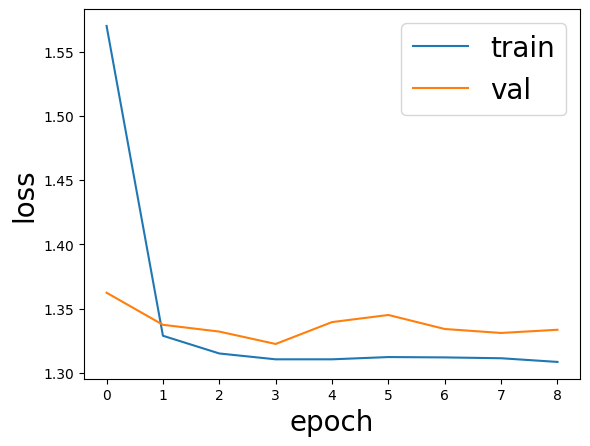

In [6]:
plt.plot(train_loss, label='train')
plt.plot(val_loss, label='val')
plt.legend(fontsize=20)
plt.xlabel('epoch',fontsize=20)
plt.ylabel('loss', fontsize=20)
plt.show()